Download file from Google Drive

In [6]:
!wget -O data.pdf 'https://drive.google.com/uc?export=download&id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD'

--2025-08-30 20:17:32--  https://drive.google.com/uc?export=download&id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD
正在查找主機 drive.google.com (drive.google.com)... 142.250.204.46
正在連接 drive.google.com (drive.google.com)|142.250.204.46|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 303 See Other
位置: https://drive.usercontent.google.com/download?id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD&export=download [跟隨至新的 URL]
--2025-08-30 20:17:32--  https://drive.usercontent.google.com/download?id=18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD&export=download
正在查找主機 drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.77.1
正在連接 drive.usercontent.google.com (drive.usercontent.google.com)|142.250.77.1|:443... 連上了。
已送出 HTTP 要求，正在等候回應... 302 Found
位置: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/download?id%3D18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD%26export%3Ddownload&followup=https://drive.usercontent.google.com/download?id%3D18cEoLhZP7WkHgnuhRcrUV_MpCDU6A9FD%2

Embedding, application, and representation

In [5]:
import numpy as np
import pandas as pd
import os
import re
import time
import nltk
from gensim.models import Word2Vec
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Run once for your environment
#nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/matt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
#this for unzip and read the file
!wget -O IMDB.zip 'https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true'
!unzip IMDB.zip
df=pd.read_csv("IMDB Dataset.csv")

--2025-10-02 14:52:00--  https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip [following]
--2025-10-02 14:52:00--  https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip [following]
--2025-10-02 14:52:01--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111

In [5]:
def preprocessing_reviews(reviews):

    """
    simple preprocessing: splitting on the space and remove word less than 1 chr
    """

    processed_reviews = []

    for review in tqdm(reviews):
        review = re.sub('<[^>]+>', '', review)
        # 只移除 HTML 和不想要的標點，但保留撇號。後續直接用 nltk.word_tokenize。
        processed = re.sub('[^a-zA-Z \']', '', review)
        words = processed.split()
        processed_reviews.append(' '.join([word.lower() for word in words if len(word) > 1]))
    return processed_reviews

df['reviews_processed'] = preprocessing_reviews(df['review'])
df['tokens'] = df['reviews_processed'].apply(nltk.word_tokenize)
df.head()

100%|██████████████████████████████████| 50000/50000 [00:01<00:00, 26192.70it/s]


,review,sentiment,reviews_processed,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...,"[wonderful, little, production, the, filming, ..."
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,negative,basically there's family where little boy jake...,"[basically, there, 's, family, where, little, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is v...,"[petter, mattei, 's, love, in, the, time, of, ..."


In [6]:
start_time = time.time()
# embedding
model = Word2Vec(sentences=df['tokens'].tolist(),
                 sg=1,
                 vector_size=100,
                 window=5,
                 workers=4)

print(f'Time needed : {(time.time() - start_time) / 60:.2f} mins')

Time needed : 1.72 mins


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

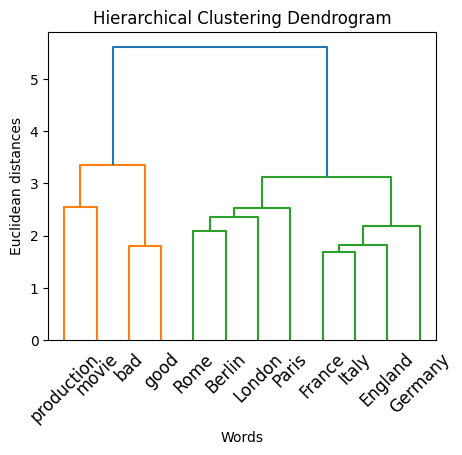

In [8]:
# Entire set of words in the model
all_words = list(model.wv.index_to_key)  
all_vectors = np.array([model.wv[word] for word in all_words])

# Highlighted words and their vectors
highlight_words = ['Berlin', 'Paris', 'London','Rome', 'Italy',
                   'France', 'Germany', 'England', 'movie', 'production', 'good', 'bad']
highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])

# Hierarchical Clustering
# linkage 函式的輸出 linked 是一個被稱為連結矩陣 (Linkage Matrix) 的 NumPy 陣列。
# Ward's method ('ward') 的目標是最小化「群內變異數的增加量」。
# 簡單來說，在每一步合併時，它會選擇那一對合併後，能讓新形成的群組內部成員「最緊湊、最相似」的組合。
# 這種方法傾向於產生大小較為均勻的群組。
linked = linkage(highlight_vectors, 'ward')

plt.figure(figsize=(5, 4))
dendrogram(linked,
           orientation='top',
           labels=highlight_words,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=45)
plt.savefig('word_dendrogram.jpg', format='jpeg', bbox_inches='tight')
plt.show()

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns
from adjustText import adjust_text

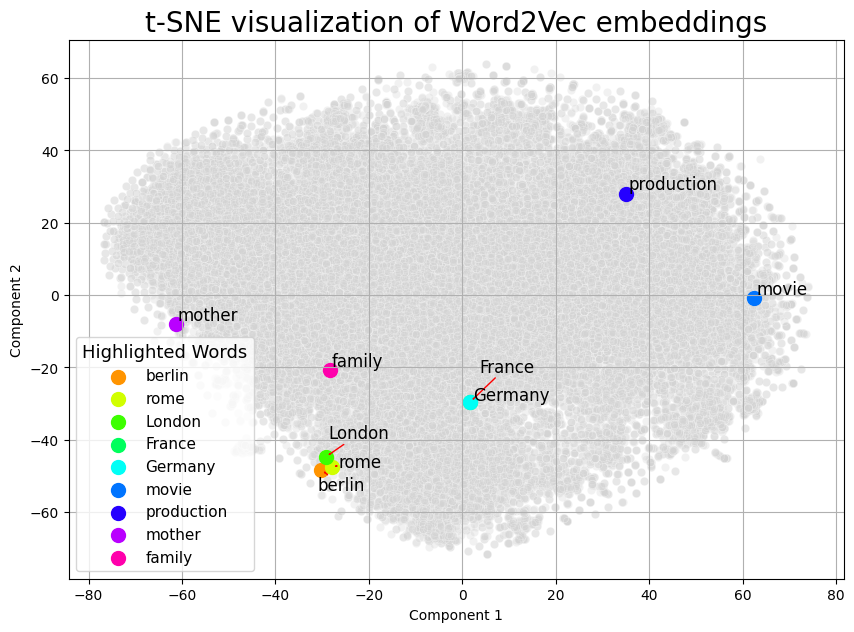

In [10]:
# Apply t-SNE to the entire set of vectors
tsne = TSNE(n_components=2, random_state=0)
Y_tsne = tsne.fit_transform(all_vectors)

highlight_words = ['berlin', 'rome', 'London', 'France', 'Germany',
                    'movie', 'production', 'mother', 'family']

highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])
Y_highlight = Y_tsne[indices]

plt.figure(figsize=(10, 7))

sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], color="lightgrey", alpha=0.3)

# Plot highlighted words 
palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)
    # adjust text
    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_tsne.jpg', format='jpeg')
plt.show()

In [11]:
from umap import UMAP

/Users/matt/Github/venv.ai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/matt/Github/venv.ai/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


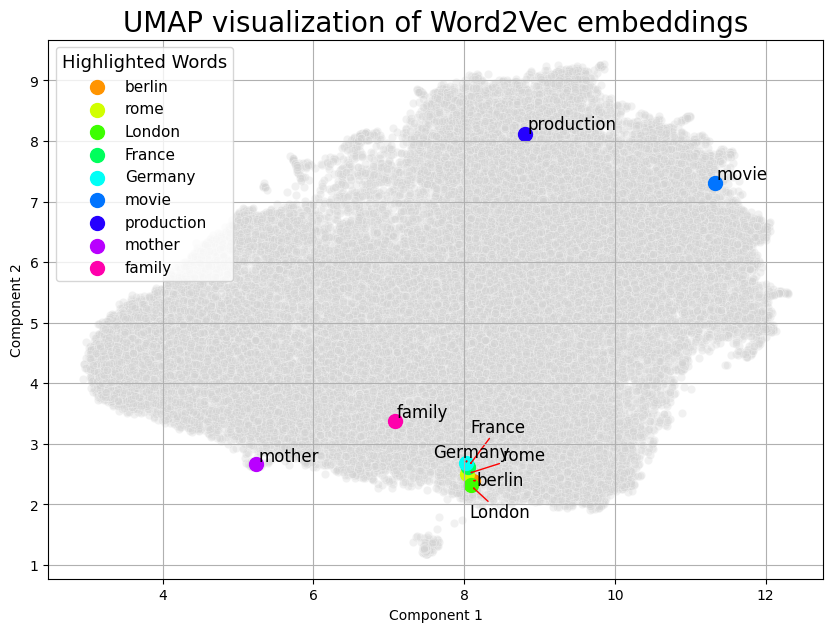

In [12]:
# Apply UMAP to the entire set of vectors
umap = UMAP(n_components=2, random_state=42)  
Y_umap = umap.fit_transform(all_vectors)

Y_highlight = Y_umap[indices]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=Y_umap[:, 0], y=Y_umap[:, 1], color="lightgrey", alpha=0.3)

palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)

    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('UMAP visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_umap.jpg', format='jpeg')
plt.show()

In [13]:
word_1 = "good"
syn = "great"
ant = "bad"
most_sim =model.wv.most_similar("good")
print("Top 3 most simalr words to {} are :{}".format(word_1, most_sim[:3]))

synonyms_dist = model.wv.distance(word_1, syn)
antonyms_dist = model.wv.distance(word_1, ant)
print("Synonyms {}, {} have cosine distance: {}".format(word_1, syn, synonyms_dist))
print("Antonyms {}, {} have cosine distance: {}".format(word_1, ant, antonyms_dist))
a = 'king'
a_star = 'man'
b = 'woman'
b_star= model.wv.most_similar(positive=[a, b], negative=[a_star])
print("{} is to {} as {} is to: {} ".format(a, a_star, b, b_star[0][0]))

Top 3 most simalr words to good are :[('decent', 0.8148519396781921), ('great', 0.7818940877914429), ('bad', 0.7750296592712402)]
Synonyms good, great have cosine distance: 0.21810591220855713
Antonyms good, bad have cosine distance: 0.224970281124115
king is to man as woman is to: queen 


# Classify review with deep learning

In [1]:
import torch

is_cuda = torch.cuda.is_available()

# Check if we GPU available
if is_cuda:
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU


In [ ]:
# Run once for your environment
import nltk
# 停用詞 (Stopwords) 列表
# 停用詞是指在文本中出現頻率非常高，但通常不帶有太多實際語義的詞。例如，在英文中，"a", "an", "the", 
# "is", "in", "on" 等冠詞、介詞、代詞、助動詞都屬於停用詞。
#nltk.download('stopwords')
# Punkt Tokenizer Models
# punkt 是一個預先訓練好的機器學習模型，NLTK 使用它來進行智能分詞。它不僅僅是簡單地用空格來切分單字，
# 還能很好地處理縮寫（如 "Dr." 或 "U.S.A."）、句點、問號等，從而準確地將段落分割成句子，再將句子分割成單詞。
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/matt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/matt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from sklearn.model_selection import train_test_split

#this for unzip and read the file
try:
    df=pd.read_csv("IMDB Dataset.csv")
except:
    !wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
    !unzip IMDB.zip?raw=true

df['sentiment_encoded'] = np.where(df['sentiment']=='positive',0,1)
X,y = df['review'].values, df['sentiment_encoded'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size=.2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,stratify=y_train, test_size=.1)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

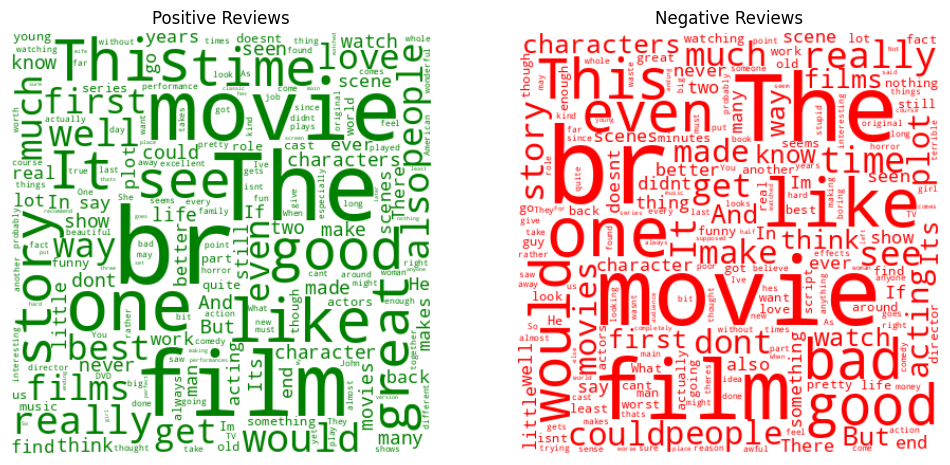

In [12]:
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from collections import Counter

def generate_wordclouds(df):
    '''
    Generate two word clouds from the 51 most frequent words in the list of positive and negative reviews respectively.
    
    '''
    stop_words = set(stopwords.words('english'))  
    
    # Separating reviews by sentiment
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']    
    
    def get_words(reviews):
        all_words = []
        for review in reviews:
            review = re.sub(r"[^\w\s]", '', review)
            review = re.sub(r"\d", '', review)
            words = review.split()
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            all_words.extend(filtered_words)
        return all_words

    
    positive_words = get_words(positive_reviews)
    negative_words = get_words(negative_reviews)
    
   
    positive_counts = Counter(positive_words)
    negative_counts = Counter(negative_words)
    
    
    positive_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "green"  
    ).generate_from_frequencies(positive_counts)
    
    negative_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "red"  
    ).generate_from_frequencies(negative_counts)
    
   
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Reviews')
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Reviews')
    plt.axis("off")
    plt.savefig('word_clouds.jpg', format='jpeg', bbox_inches='tight')
    plt.show()
    
generate_wordclouds(df)

In [13]:
from nltk.tokenize import word_tokenize

def preprocess_review(review):
    '''
    Cleaning of the review: remove non-alphanumeric characters, collapse whitespace, and remove digits.
    '''
    review = re.sub(r"[^\w\s]", ' ', review)  # Replace non-word characters with space
    review = re.sub(r"\s+", ' ', review)      # Replace multiple spaces with a single space
    review = re.sub(r"\d", '', review)        # Remove digits
    return review.strip().lower()

def tokenize_reviews(x_train, x_val, x_test):
    stop_words = set(stopwords.words('english'))
    
    # tokenize and clean list of reviews
    def tokenize_and_filter(reviews):
        word_list = []
        for review in reviews:
            words = word_tokenize(preprocess_review(review))
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            word_list.extend(filtered_words)
        return word_list

    # Create a corpus 
    corpus = Counter(tokenize_and_filter(x_train))
    # Select the 1000 most common words 
    vocab = {word: i+1 for i, word in enumerate([word for word, freq in corpus.most_common(1000)])}

    # convert reviews into sequences of indices
    def vectorize_reviews(reviews):
        vectorized = []
        for review in reviews:
            tokenized = word_tokenize(preprocess_review(review))
            indexed = [vocab[word] for word in tokenized if word in vocab]
            vectorized.append(indexed)
        return vectorized

    _x_train = vectorize_reviews(x_train)
    _x_val = vectorize_reviews(x_val)
    _x_test = vectorize_reviews(x_test)

    return _x_train, _x_val, _x_test, vocab


x_train, x_val, x_test, vocab = tokenize_reviews(x_train, x_val, x_test)


In [14]:
from torch.utils.data import TensorDataset, DataLoader

def padding_(reviews, max_seq):
    features = np.zeros((len(reviews), max_seq),dtype=int)
    for ii, review in enumerate(reviews):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:max_seq]
    return np.array(features)

train_data = TensorDataset(torch.from_numpy(padding_(x_train,500)), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(padding_(x_val,500)), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(padding_(x_test,500)), torch.from_numpy(y_test))

train_loader = DataLoader(train_data, shuffle=True, batch_size=50)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=50)
test_loader = DataLoader(test_data, shuffle=True, batch_size=50)

In [16]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN, self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=no_layers, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)  
        rnn_out, hidden = self.rnn(embeds, hidden)
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(rnn_out)
        sig_out = self.sig(out)
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]  
        return sig_out, hidden
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        return h0

# Hyperparameters
no_layers = 3
vocab_size = len(vocab) + 1  
embedding_dim = 300
output_dim = 1
hidden_dim = 256

# Initialize the model
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(model)


SentimentRNN(
  (embedding): Embedding(1001, 300)
  (rnn): GRU(300, 256, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


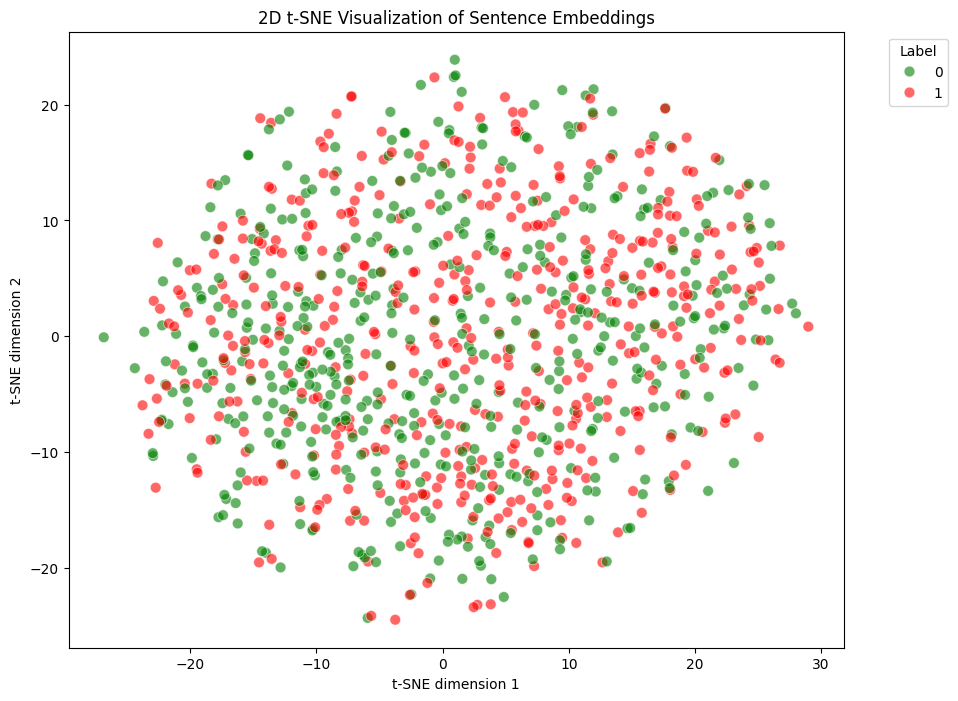

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

x_train_tsne = padding_(x_train,500)
x_train_tsne = x_train_tsne[:1000,:]
y_train_tsne= y_train[:1000]

def plot_embeddings(x_train, y_train, model, device, batch_size=50):
    model.eval()  
    embeddings_list = []

    # Create a DataLoader to handle the x_train data in batches
    train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train), 
                               torch.from_numpy(y_train))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():  # No need to track gradients
        for x_batch, _ in train_loader:
            x_batch = x_batch.to(device)
            hidden = model.init_hidden(x_batch.size(0))
            
            # Feed forward through the model to get to the embeddings layer
            embeds = model.embedding(x_batch)
            rnn_out, hidden = model.rnn(embeds, hidden)
            rnn_out = rnn_out.contiguous().view(-1, model.hidden_dim)  # Flatten the output
            out = model.dropout(rnn_out)
            linear_output = model.fc(out)
            
            embeddings_list.append(linear_output.cpu())  # Store CPU data

    #print("Shape of linear_output:", linear_output.shape)

    # Concatenate all batch embeddings into a single matrix
    all_embeddings = torch.cat(embeddings_list, dim=0)
    #print("Shape of all_embeddings:", all_embeddings.shape)

    all_embeddings = all_embeddings.view(-1, 500)  

    # Reduce dimensions to 2D using t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(all_embeddings.numpy()) 

    df = pd.DataFrame(data=embeddings_2d, columns=['TSNE-1', 'TSNE-2'])
    df['label'] = y_train  
    custom_palette = {0: 'green', 1: 'red'}

    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='label', palette=custom_palette , s=60, alpha=0.6)
    plt.title('2D t-SNE Visualization of Sentence Embeddings')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2)  
    plt.savefig('tsne_model_untrained_projection.jpg', format='jpeg', bbox_inches='tight')
    plt.show()


plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)


In [25]:
import torch.optim as optim

lr = 0.001

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def acc(pred, label):
    """Calculate accuracy by comparing predicted labels with true labels."""
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

clip = 5
epochs = 5
valid_loss_min = np.inf  

epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()  # Set model to training mode

    # Initialize hidden state
    h = model.init_hidden(50)
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Detach hidden states
        h = h.data
        
        model.zero_grad()
        output, h = model(inputs, h)
        
        # Calculate the loss
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        # Calculate accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy

        # Clip gradients to prevent exploding gradient issues in RNNs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
    
    # Validation phase
    val_losses = []
    val_acc = 0.0
    model.eval()  # Set model to evaluation mode
    val_h = model.init_hidden(50)

    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Detach hidden states
        val_h = val_h.data

        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())

        accuracy = acc(output, labels)
        val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc / len(train_loader.dataset)
    epoch_val_acc = val_acc / len(valid_loader.dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)

    print(f'Epoch {epoch+1}')
    print(f'Train Loss: {epoch_train_loss} Val Loss: {epoch_val_loss}')
    print(f'Train Accuracy: {epoch_train_acc * 100}% Val Accuracy: {epoch_val_acc * 100}%')
    print(' ')



Epoch 1
Train Loss: 0.4868504948914051 Val Loss: 0.45143151804804804
Train Accuracy: 70.71666666666667% Val Accuracy: 85.475%
 
Epoch 2
Train Loss: 0.48304208864768344 Val Loss: 0.45571701414883137
Train Accuracy: 70.69166666666666% Val Accuracy: 85.25%
 
Epoch 3
Train Loss: 0.4745436372028457 Val Loss: 0.4539298627525568
Train Accuracy: 71.12777777777778% Val Accuracy: 85.3%
 
Epoch 4
Train Loss: 0.46673448789450855 Val Loss: 0.45919169336557386
Train Accuracy: 71.73333333333333% Val Accuracy: 84.55%
 
Epoch 5
Train Loss: 0.4636479153815243 Val Loss: 0.45072976425290107
Train Accuracy: 72.0611111111111% Val Accuracy: 85.7%
 


Accuracy on test set: 0.8339


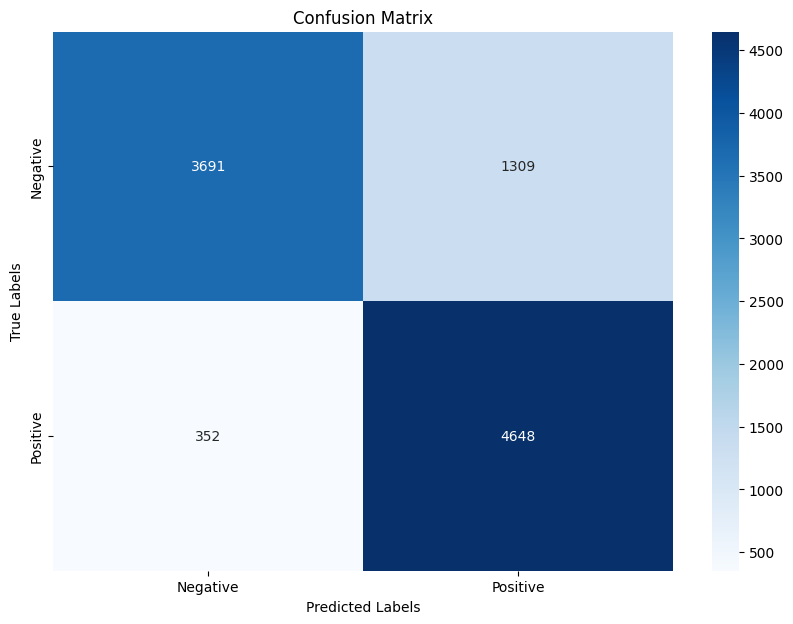

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def predict_batch(model, data_loader, device):
    """Predict output for a batch of data using the RNN model."""
    model.eval()  
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            batch_size = inputs.size(0)
            
            hidden = model.init_hidden(batch_size).to(device)

            output, _ = model(inputs, hidden)
            
            predicted_probs = torch.sigmoid(output)
            predicted_labels = (predicted_probs > 0.60).float() 
            
            predictions.extend(predicted_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels, predicted_probs, labels


predictions, true_labels, predicted_probs, labels = predict_batch(model, test_loader, device)
print(f'Accuracy on test set: {accuracy_score(true_labels, predictions)}')
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', format='jpeg', bbox_inches='tight')
plt.show()

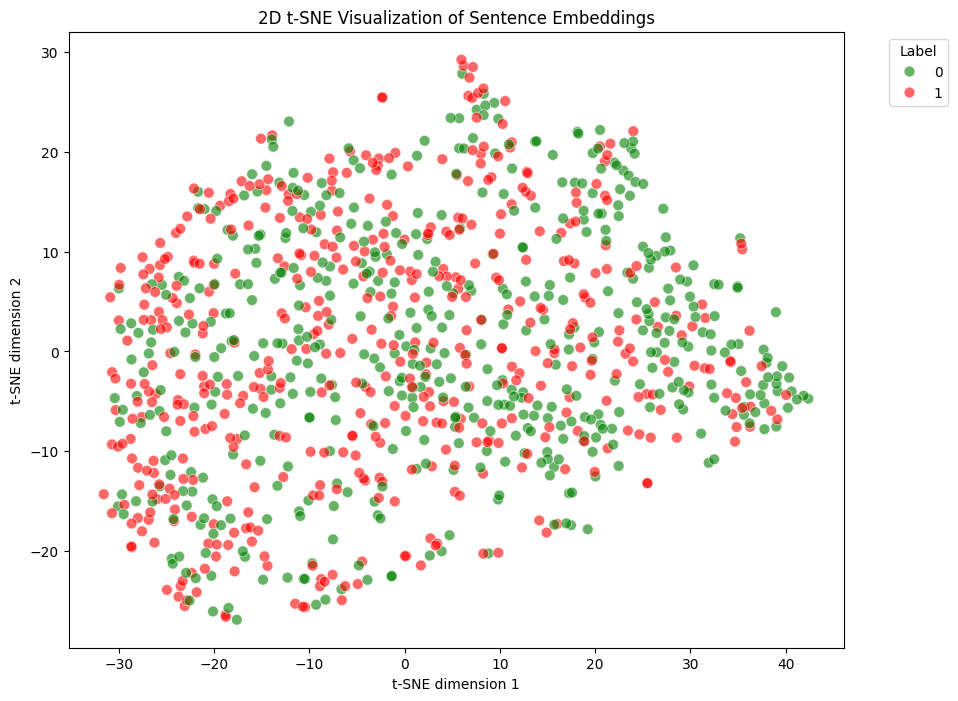

In [23]:
plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)